<a href="https://colab.research.google.com/github/exp0nent/Kaggle_Practice/blob/main/Abalone_Age_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv('abalone.csv')

In [34]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [35]:
print(df['Sex'].value_counts())
print(df['Sex'].unique())

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64
['M' 'F' 'I']


<Axes: xlabel='Sex', ylabel='Count'>

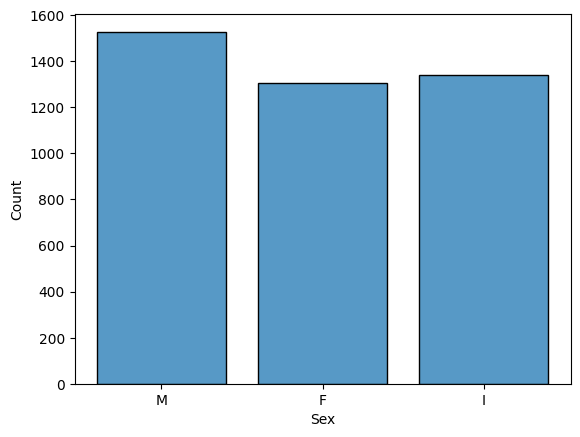

In [36]:
sns.histplot(df['Sex'], kde=None, shrink=0.8, palette='viridis')

In [37]:
print(df['Rings'].unique())
print(df['Rings'].value_counts())

[15  7  9 10  8 20 16 19 14 11 12 18 13  5  4  6 21 17 22  1  3 26 23 29
  2 27 25 24]
Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
29      1
26      1
2       1
25      1
Name: count, dtype: int64


In [38]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [39]:
df.shape

(4177, 9)

In [40]:
df.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole weight,0
Shucked weight,0
Viscera weight,0
Shell weight,0
Rings,0


In [41]:
df.duplicated().sum()

np.int64(0)

## Encoding

In [42]:
df['Sex'] = df['Sex'].map({"M":0,"F":1,"I":2})

In [43]:
'''def encode_sex(dataframe):
  encoded_sex = []
  for sex in dataframe['Sex']:
    if sex == "M":
      encoded_sex.append(0)
    elif sex == "F":
      encoded_sex.append(1)
    else:
      encoded_sex.append(2)
  dataframe['Sex'] = encoded_sex
  return dataframe
'''
# encoded_df_ifelse = encode_sex_ifelse(df.copy()) # Use .copy() to avoid modifying the original DataFrame
# display(encoded_df_ifelse.head())

'def encode_sex(dataframe):\n  encoded_sex = []\n  for sex in dataframe[\'Sex\']:\n    if sex == "M":\n      encoded_sex.append(0)\n    elif sex == "F":\n      encoded_sex.append(1)\n    else:\n      encoded_sex.append(2)\n  dataframe[\'Sex\'] = encoded_sex\n  return dataframe\n'

In [44]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# EDA ( Exploratory data Analysis)

In [45]:
corr = df.corr()

<Axes: >

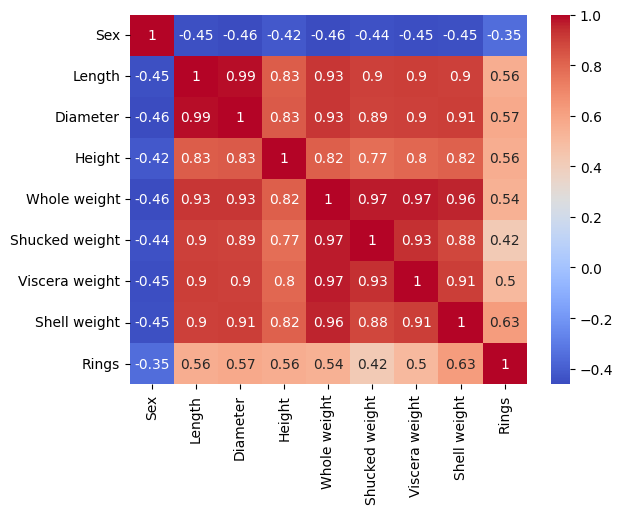

In [46]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: xlabel='Rings', ylabel='Count'>

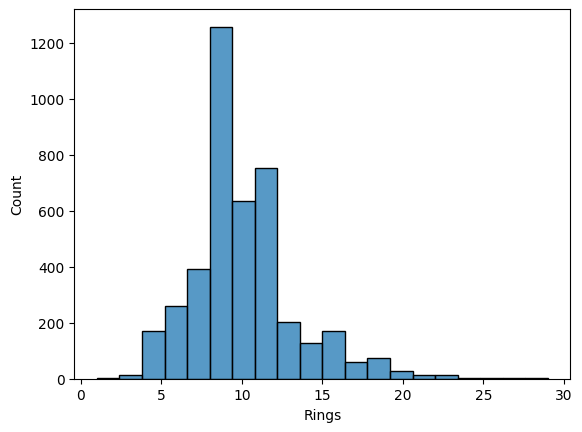

In [47]:
sns.histplot(df['Rings'], bins=20, palette='viridis')

<Axes: xlabel='Length', ylabel='Rings'>

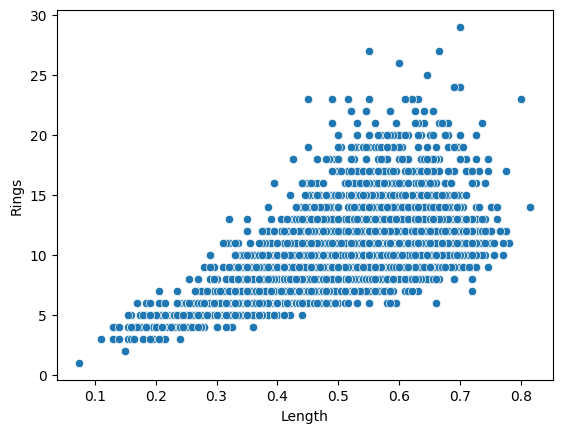

In [48]:
sns.scatterplot(data=df, x='Length', y='Rings')

<Axes: xlabel='Length', ylabel='Rings'>

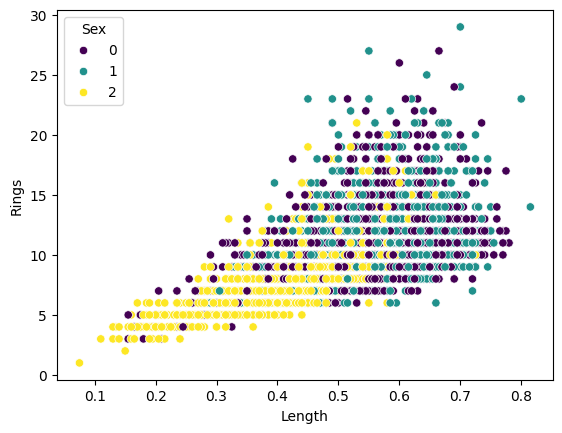

In [49]:
sns.scatterplot(data=df, x='Length', y='Rings', hue='Sex', palette='viridis')

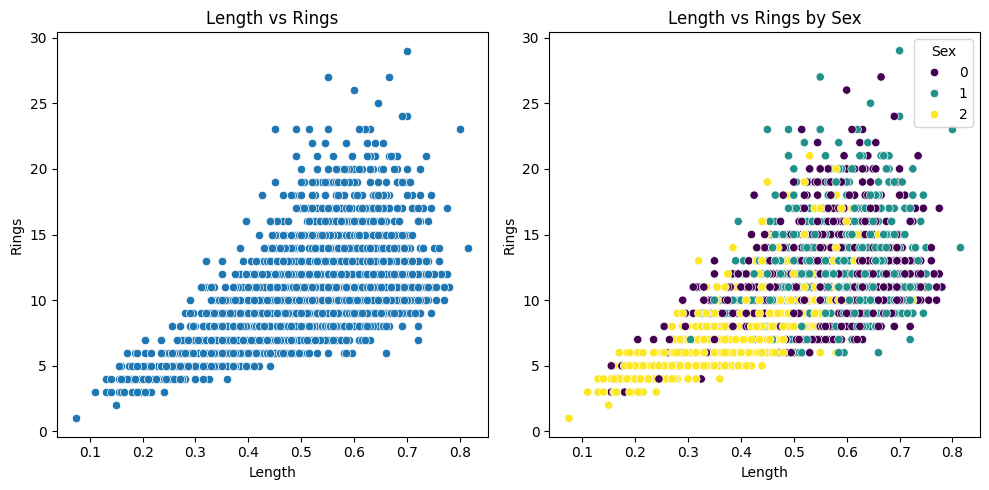

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(data=df, x='Length', y='Rings', ax=axes[0])
axes[0].set_title('Length vs Rings')

sns.scatterplot(data=df, x='Length', y='Rings', hue='Sex', palette='viridis', ax=axes[1])
axes[1].set_title('Length vs Rings by Sex')

plt.tight_layout()
plt.show()

# Train Test split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = df.drop('Rings', axis=1)
y = df['Rings']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standarization the data

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [55]:
X_train_scaled


array([[ 1.26075882,  0.21017452,  0.36972535, ..., -0.32540694,
        -0.40512998, -0.21213236],
       [ 1.26075882, -0.41944448, -0.5423862 , ..., -0.48012641,
        -0.82093157, -0.71241871],
       [ 0.05278772, -1.84658088, -1.85988065, ..., -1.35462776,
        -1.34639511, -1.39137875],
       ...,
       [-1.15518338, -0.12562228, -0.13700329, ..., -0.52273032,
        -0.43254547, -0.36936522],
       [-1.15518338,  0.42004752,  0.57241681, ...,  0.69708696,
         0.34422673, -0.03345867],
       [ 0.05278772,  0.58794593,  0.67376253, ...,  0.83611025,
         0.45845793,  0.22383145]])

In [56]:
X_test_scaled

array([[-1.15518338,  0.67189513,  0.47107108, ...,  0.27104784,
         1.10272193,  0.60976664],
       [-1.15518338,  0.54597132,  0.31905249, ...,  0.11857068,
         0.31224199,  0.03801081],
       [ 0.05278772,  0.29412372,  0.36972535, ..., -0.24916836,
         0.39905771,  0.68123611],
       ...,
       [ 1.26075882,  0.16819992,  0.21770676, ..., -0.03614879,
        -0.20865231, -0.22642626],
       [ 1.26075882, -0.50339368, -0.5423862 , ..., -0.47339947,
        -0.81636232, -0.39795301],
       [ 1.26075882, -1.34288568, -1.35315201, ..., -1.17748518,
        -1.30984112, -1.17697032]])

# Model Selection

In [57]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [58]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}

results_df = pd.DataFrame(results).T
display(results_df.round(2))

# One more method is here using list

,MSE,R2
Linear Regression,4.95,0.54
Ridge,4.95,0.54
Lasso,7.69,0.29
Decision Tree Regressor,8.81,0.19
Random Forest Regressor,4.94,0.54
Support Vector Regressor,4.88,0.55
Gradient Boosting Regressor,5.10,0.53
K-Neighbors Regressor,5.24,0.52


The MSE represents the average squared difference between the predicted and actual values, and a lower MSE indicates better performance.

The R2 score represents the proportion of variance in the target variable that is predictable from the independent variables, and a higher R2 score indicates better performance.

# Chosen Model

# Chosen Model: Decision Tree Regressor

In [59]:
# Initialize and train the Decision Tree Regressor
DTR = DecisionTreeRegressor(random_state=42)
DTR.fit(X_train_scaled, y_train)

print("Decision Tree Regressor model trained.")

# Evaluate the Decision Tree Regressor
y_pred_dtr = DTR.predict(X_test_scaled)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)

# Create a DataFrame for the results
dtr_results = {'Decision Tree Regressor': {'MSE': mse_dtr, 'R2': r2_dtr}}
dtr_results_df = pd.DataFrame(dtr_results).T

display(dtr_results_df.round(2))

Decision Tree Regressor model trained.


,MSE,R2
Decision Tree Regressor,8.94,0.17


In [60]:
def prediction_rings(Sex, Length, Diameter, Height, Whole_weight, Shucked_weight, Viscera_weight, Shell_weight):
    """
    Predicts the number of rings for an abalone using the trained Decision Tree Regressor.

    Args:
        Sex: The sex of the abalone (0 for Male, 1 for Female, 2 for Infant).
        Length: The longest shell measurement.
        Diameter: The diameter of the abalone.
        Height: The height of the abalone.
        Whole_weight: The whole abalone weight.
        Shucked_weight: The weight of the meat.
        Viscera_weight: The weight of the gut.
        Shell_weight: The weight of the shell after being dried.

    Returns:
        The predicted number of rings.
    """
    # Create a numpy array from the input features
    features = np.array([[Sex, Length, Diameter, Height, Whole_weight, Shucked_weight, Viscera_weight, Shell_weight]])

    # Scale the features using the same scaler fitted on the training data
    scaled_features = sc.transform(features)

    # Make prediction using the trained Decision Tree Regressor
    pred_rings = DTR.predict(scaled_features)

    # The prediction is an array, return the single predicted value
    return pred_rings[0]

# Example usage with sample values:
Sex = 0  # Male
Length = 0.6
Diameter = 0.45
Height = 0.15
Whole_weight = 1.0
Shucked_weight = 0.4
Viscera_weight = 0.2
Shell_weight = 0.3

predicted_rings = prediction_rings(Sex, Length, Diameter, Height, Whole_weight, Shucked_weight, Viscera_weight, Shell_weight)

print(f"Predicted number of rings: {predicted_rings:.2f}")

Predicted number of rings: 12.00


In [62]:
def prediction_age(Sex,Length,Diameter,Height,Whole_weght,shucked_weght,visc_wet,shell_weight):
    features = np.array([[Sex,Length,Diameter,Height,Whole_weght,shucked_weght,visc_wet,shell_weight]])

    pred = DTR.predict(features).reshape(1,-1)

    return pred[0]


Sex = 2
Length = 8.0
Diameter = 4.0
Height = 6.0
Whole_weght = 10.0
shucked_weght = 20.0
visc_wet = 20.0
shell_weight = 15.0


prediciton = prediction_age(Sex,Length,Diameter,Height,Whole_weght,shucked_weght,visc_wet,shell_weight)

if prediciton[0] == 0:
    print("{} is a Male".format(prediciton))
elif prediciton[0] == 1:
    print("{} is a Female".format(prediciton))
else:
    print("{} is a Ifant".format(prediciton))

[14.] is a Ifant
